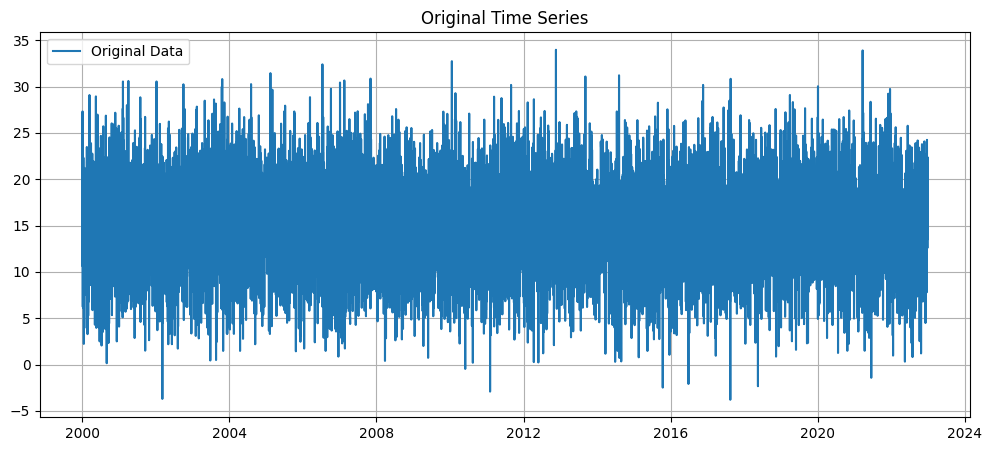

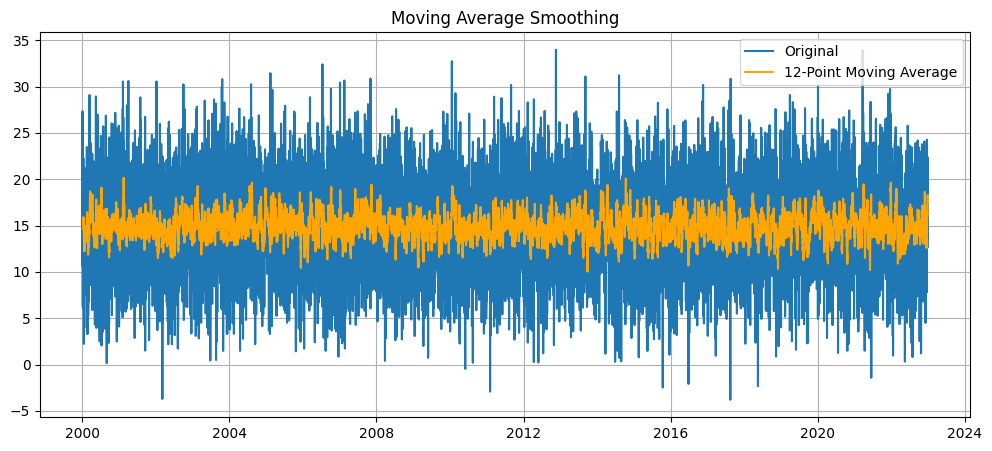

<ipython-input-1-3011307d0676>:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=last_date, periods=forecast_periods + 1, freq='M')[1:]


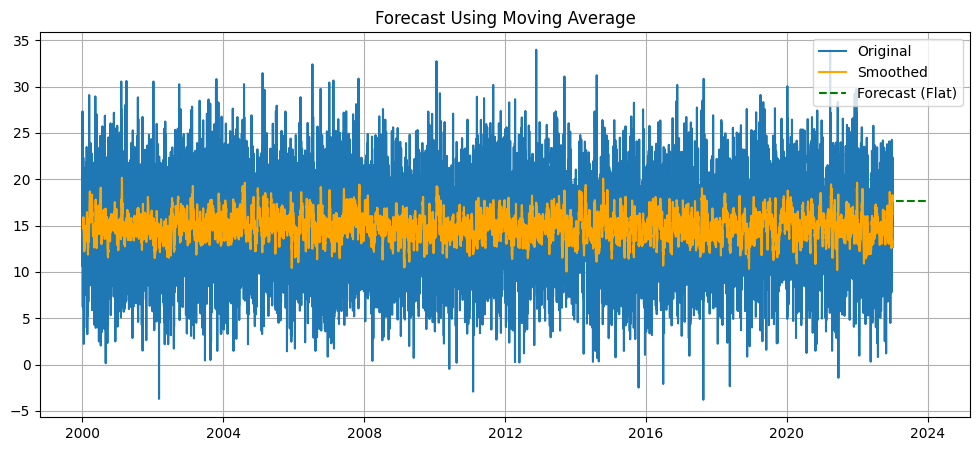

In [1]:
# Step 1: Import Libraries
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Load the Dataset
file_path = '/content/climate_change_data.csv'
df = pd.read_csv(file_path)

# Step 3: Preprocess the Data
# Assume the first column is date and the second is the value column
df.columns = [col.strip() for col in df.columns]
date_col = df.columns[0]
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
df.set_index(date_col, inplace=True)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include='number')

# Ensure we have numeric data
if df_numeric.empty:
    raise ValueError("No numeric columns found!")

# Select the first numeric column for analysis
value_col = df_numeric.columns[0]
data = df_numeric[[value_col]].copy()

# Step 4: Plot Original Data
plt.figure(figsize=(12, 5))
plt.plot(data, label='Original Data')
plt.title('Original Time Series')
plt.grid(True)
plt.legend()
plt.show()

# Step 5: Apply Moving Average Smoothing
window_size = 12  # Can be changed based on data
data['Smoothed'] = data[value_col].rolling(window=window_size).mean()

# Plot Smoothed Data
plt.figure(figsize=(12, 5))
plt.plot(data[value_col], label='Original')
plt.plot(data['Smoothed'], label=f'{window_size}-Point Moving Average', color='orange')
plt.title('Moving Average Smoothing')
plt.grid(True)
plt.legend()
plt.show()

# Step 6: Simple Forecasting using Last Smoothed Value
forecast_periods = 12
last_date = data.index[-1]
forecast_index = pd.date_range(start=last_date, periods=forecast_periods + 1, freq='M')[1:]

last_smoothed_value = data['Smoothed'].dropna().iloc[-1]
forecast_values = [last_smoothed_value] * forecast_periods

forecast_df = pd.DataFrame({value_col: forecast_values}, index=forecast_index)

# Plot Forecast
plt.figure(figsize=(12, 5))
plt.plot(data[value_col], label='Original')
plt.plot(data['Smoothed'], label='Smoothed', color='orange')
plt.plot(forecast_df, label='Forecast (Flat)', linestyle='--', color='green')
plt.title('Forecast Using Moving Average')
plt.grid(True)
plt.legend()
plt.show()
